## Advertising Sales Channel Prediction

When a company enters a market, the distribution strategy and channel it uses are keys to its success in the market, as well as market know-how and customer knowledge and understanding. Because an effective distribution strategy under efficient supply-chain management opens doors for attaining competitive advantage and strong brand equity in the market, it is a component of the marketing mix that cannot be ignored . 

The distribution strategy and the channel design have to be right the first time. The case study of Sales channel includes the detailed study of TV, radio and newspaper channel. The predict the total sales generated from all the sales channel.

In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv(r"C:\Users\MANISHA JUDHA\Desktop\assingment\Advertising Sales.txt")
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [3]:
df.describe()

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [4]:
df=df.drop(columns=['Unnamed: 0'],axis=1)
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


###### Data Cleaning

In [6]:
df.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

In [7]:
#Graph Visualition
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

<AxesSubplot:xlabel='TV', ylabel='Density'>

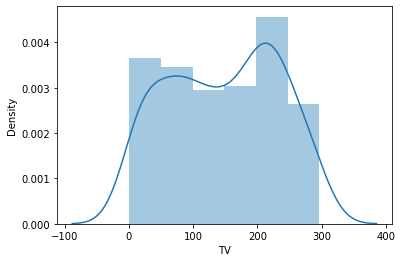

In [8]:
sns.distplot(df['TV'])

<AxesSubplot:xlabel='radio', ylabel='Density'>

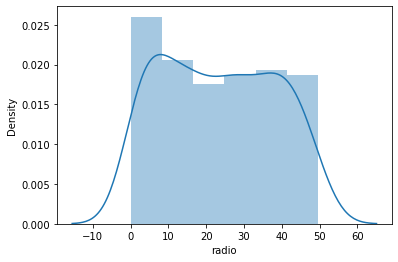

In [9]:
sns.distplot(df['radio'])

<AxesSubplot:xlabel='newspaper', ylabel='Density'>

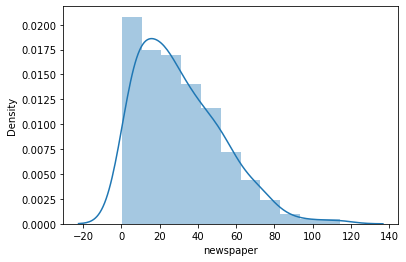

In [10]:
sns.distplot(df['newspaper'])

<AxesSubplot:xlabel='sales', ylabel='Density'>

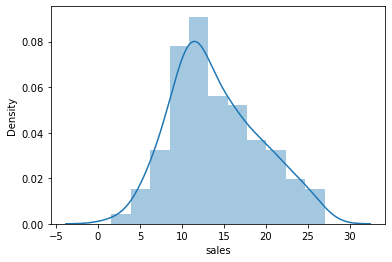

In [11]:
sns.distplot(df['sales'])

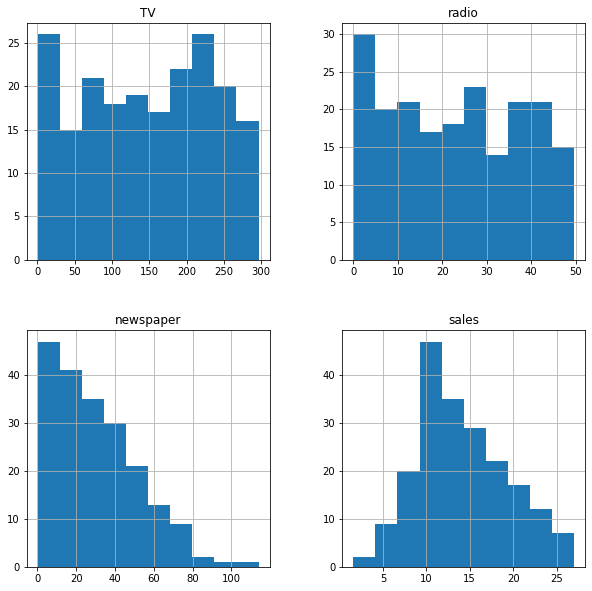

In [12]:
#all data together
df.hist( bins = 10, figsize = (10,10))
plt.show()

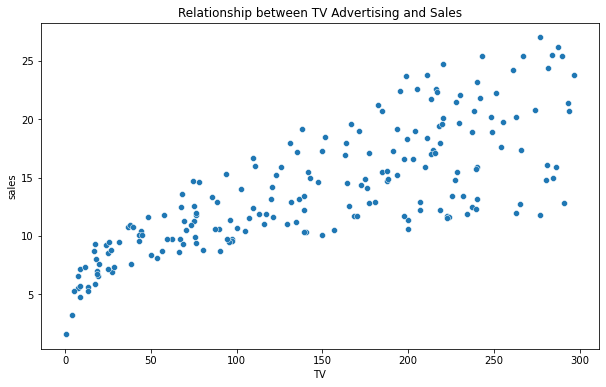

In [13]:
plt.figure(figsize=[10,6])
plt.title('Relationship between TV Advertising and Sales')
sns.scatterplot(df['TV'], df['sales']);

TV advertising and sales are increased.

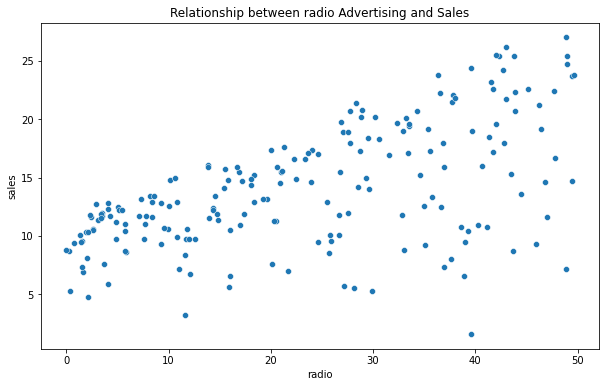

In [14]:
plt.figure(figsize=[10,6])
plt.title('Relationship between radio Advertising and Sales')
sns.scatterplot(df['radio'], df['sales']);

radio advertising is increased, sales are also increased. But Radio advertising is less effective than TV.

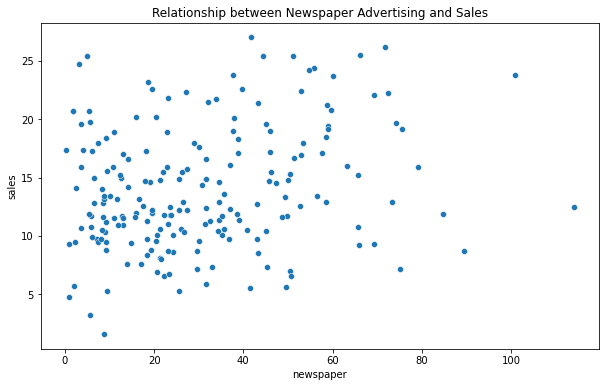

In [15]:
plt.figure(figsize=[10,6])
plt.title('Relationship between Newspaper Advertising and Sales')
sns.scatterplot(df['newspaper'], df['sales']);

Upon reviewing above plot, newspaper advertising has high effect on sales positively at initial. However, as advertising is increased, it has low effect on sales and almost nil at max

TV advertising has higher positive impact on sales and followed by radio. So TV and radio will have higher correlation with sales

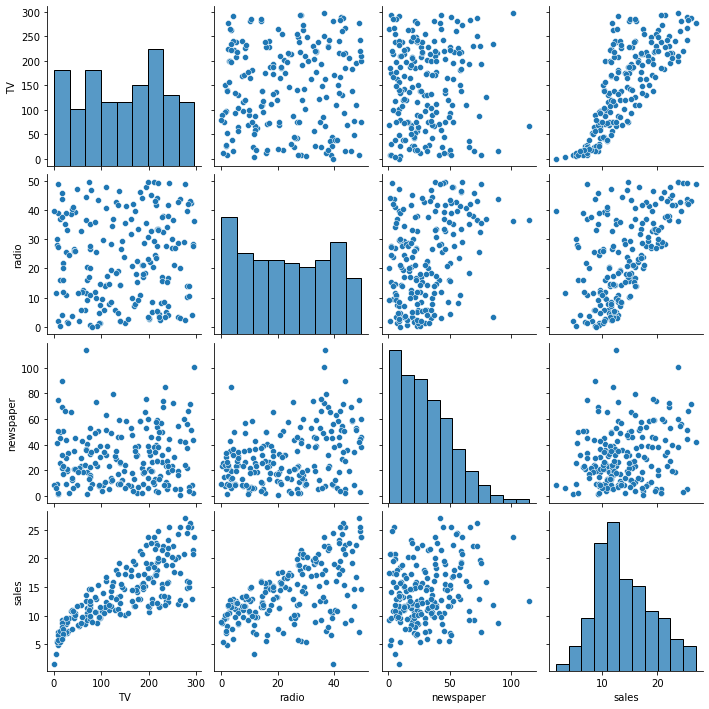

In [24]:
# Graphs
sns.pairplot(df)

<AxesSubplot:>

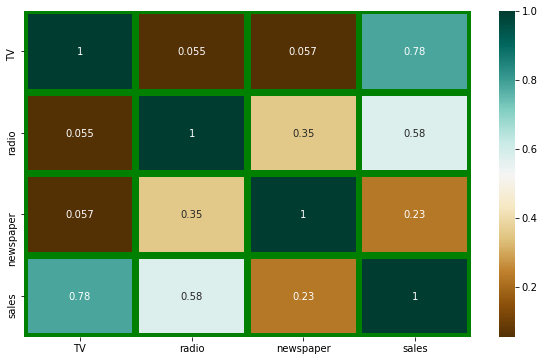

In [28]:
corr=df.corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr,annot=True,linewidths=6,linecolor='g',cmap='BrBG')

In [30]:
corr["sales"].sort_values(ascending=False)

sales        1.000000
TV           0.782224
radio        0.576223
newspaper    0.228299
Name: sales, dtype: float64

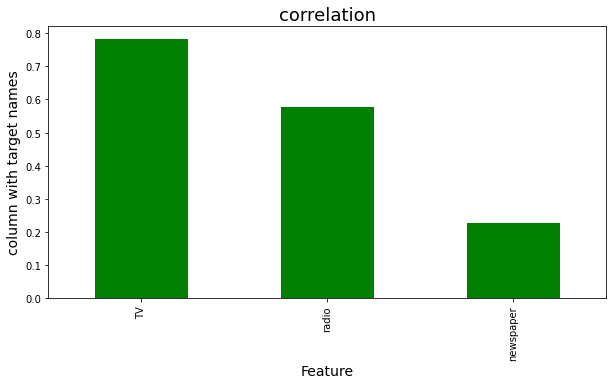

In [34]:
plt.figure(figsize=(10,5))
df.corr()['sales'].sort_values(ascending=False).drop(['sales']).plot(kind='bar',color='g')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

In [35]:
x=df.drop("sales",axis=1)
y=df["sales"]

In [37]:
x.skew()

TV          -0.069853
radio        0.094175
newspaper    0.894720
dtype: float64